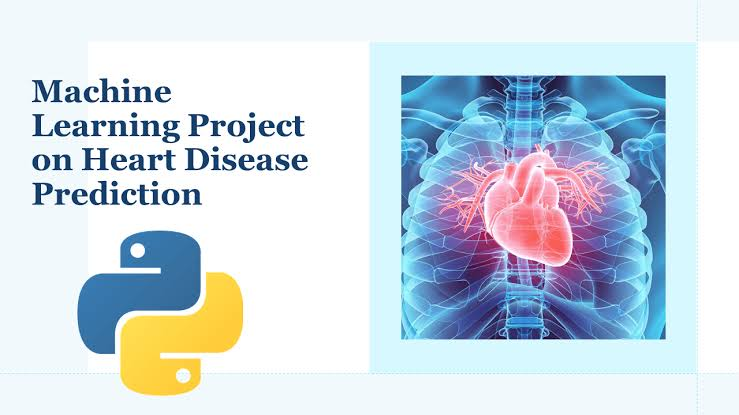

### 1. Data Description

In [3]:
'''
This database contains 13 attributes and a target variable. It has 8 nominal values and 5 numeric values. The detailed description of all these features 
are as follows:http://localhost:8888/tree

1. Age: Patients Age in years (Numeric)
2. Sex: Gender (Male : 1; Female : 0) (Nominal)
3. cp: Type of chest pain experienced by patient. This term categorized into 4 category.
0 typical angina, 1 atypical angina, 2 non- anginal pain, 3 asymptomatic (Nominal)
4. trestbps: patient's level of blood pressure at resting mode in mm/HG (Numerical)
5. chol: Serum cholesterol in mg/dl (Numeric)
6. fbs: Blood sugar levels on fasting > 120 mg/dl represents as 1 in case of true and 0 as false (Nominal)
7. restecg: Result of electrocardiogram while at rest are represented in 3 distinct values
0 : Normal 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of >
0.05 mV) 2: showing probable or definite left ventricular hypertrophyby Estes' criteria (Nominal)
8. thalach: Maximum heart rate achieved (Numeric)
9. exang: Angina induced by exercise 0 depicting NO 1 depicting Yes (Nominal)
10. oldpeak: Exercise induced ST-depression in relative with the state of rest (Numeric)
11. slope: ST segment measured in terms of slope during peak exercise
0: up sloping; 1: flat; 2: down sloping(Nominal)
12. ca: The number of major vessels (0–3)(nominal)
13. thal: A blood disorder called thalassemia
0: NULL 1: normal blood flow 2: fixed defect (no blood flow in some part of the heart) 3: reversible defect (a blood flow is observed but it is not normal(nominal)
14. target: It is the target variable which we have to predict 1 means patient is suffering from heart disease and 0 means patient is normal.
''';

### 2.Importing Libraries

In [5]:
# data warning & pre-processing
import warnings
warnings.filterwarnings('ignore')
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

### 3.Loading Dataset

In [7]:
df=pd.read_csv('Heart_disease_cleveland_new.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,0,145,233,1,2,150,0,2.3,2,0,2,0
1,67,1,3,160,286,0,2,108,1,1.5,1,3,1,1
2,67,1,3,120,229,0,2,129,1,2.6,1,2,3,1
3,37,1,2,130,250,0,0,187,0,3.5,2,0,1,0
4,41,0,1,130,204,0,2,172,0,1.4,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,0,110,264,0,0,132,0,1.2,1,0,3,1
299,68,1,3,144,193,1,0,141,0,3.4,1,2,3,1
300,57,1,3,130,131,0,0,115,1,1.2,1,1,3,1
301,57,0,1,130,236,0,2,174,0,0.0,1,1,1,1


Let see some of the sample entries of dataset

In [9]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,0,145,233,1,2,150,0,2.3,2,0,2,0
1,67,1,3,160,286,0,2,108,1,1.5,1,3,1,1
2,67,1,3,120,229,0,2,129,1,2.6,1,2,3,1
3,37,1,2,130,250,0,0,187,0,3.5,2,0,1,0
4,41,0,1,130,204,0,2,172,0,1.4,0,0,1,0


As we can see from above dataset entries some of the features should be nominal and to be encoded as their category as their category type. in the next 
step we will be encoding features to their respective category as per the dataset descripition

### 4. Data Cleaning and Preprocessing

In this step we will first change the name of columns as some of the columns have weird naming pattern and then we will encode the features into 
categorical variables

In [13]:
df.columns=['Age','Sex','Chest_Pain_Type','Resting_Blood_Pressure','Cholesterol','Fasting_Blood_Sugar','Rest_ecg','Maximum_heart_rate',
            'Exercise_induced_angina','ST_depression','St_slope','Ca','thalassemia','Target']

In [14]:
# converting features to categorical features

df['Chest_Pain_Type'][df['Chest_Pain_Type'] == 0] = 'typical angina'
df['Chest_Pain_Type'][df['Chest_Pain_Type'] == 1] = 'atypical angina'
df['Chest_Pain_Type'][df['Chest_Pain_Type'] == 2] = 'non- anginal pain'
df['Chest_Pain_Type'][df['Chest_Pain_Type'] == 3] = 'asymptomatic'

df['Resting_Blood_Pressure'][df['Resting_Blood_Pressure'] == 0] = 'Normal'
df['Resting_Blood_Pressure'][df['Resting_Blood_Pressure'] == 1] = 'ST-T wave abnormality'
df['Resting_Blood_Pressure'][df['Resting_Blood_Pressure'] == 2] = 'Left ventricular hypertrophy'

df['St_slope'][df['St_slope'] ==0] = 'Up_sloping'
df['St_slope'][df['St_slope'] ==1] = 'Flat'
df['St_slope'][df['St_slope'] ==2] = 'Down_sloping'



In [15]:
df['Sex']=df.Sex.apply(lambda x:'male' if x==1 else 'female')

In [16]:
df['Chest_Pain_Type'].value_counts()

Chest_Pain_Type
asymptomatic         144
non- anginal pain     86
atypical angina       50
typical angina        23
Name: count, dtype: int64

In [17]:
df['Rest_ecg'].value_counts()

Rest_ecg
0    151
2    148
1      4
Name: count, dtype: int64

Here
        0 ----> Normal 

        1 ----> ST-wave abnormality 

        2 ----> Left ventricular hypertrophy

In [19]:
df['St_slope'].value_counts()

St_slope
Up_sloping      142
Flat            140
Down_sloping     21
Name: count, dtype: int64

In [20]:
# Checking the top 5 enteries of dataset after feature encoding
df.head()

,Age,Sex,Chest_Pain_Type,Resting_Blood_Pressure,Cholesterol,Fasting_Blood_Sugar,Rest_ecg,Maximum_heart_rate,Exercise_induced_angina,ST_depression,St_slope,Ca,thalassemia,Target
0,63,male,typical angina,145,233,1,2,150,0,2.3,Down_sloping,0,2,0
1,67,male,asymptomatic,160,286,0,2,108,1,1.5,Flat,3,1,1
2,67,male,asymptomatic,120,229,0,2,129,1,2.6,Flat,2,3,1
3,37,male,non- anginal pain,130,250,0,0,187,0,3.5,Down_sloping,0,1,0
4,41,female,atypical angina,130,204,0,2,172,0,1.4,Up_sloping,0,1,0


As we can see features are encoded sucessfully to their respective categories.Next we will be checking if there is any missing entry or not?

In [22]:
# Checking missing entries in the dataset columwise
df.isna().sum()

Age                        0
Sex                        0
Chest_Pain_Type            0
Resting_Blood_Pressure     0
Cholesterol                0
Fasting_Blood_Sugar        0
Rest_ecg                   0
Maximum_heart_rate         0
Exercise_induced_angina    0
ST_depression              0
St_slope                   0
Ca                         0
thalassemia                0
Target                     0
dtype: int64

So,there are no missing entries in the dataset thats great.Next we will move towards exploring the dataset by performing dattailed EDA

In [24]:
# Select numeric features
numeric_features = ['Age', 'Resting_Blood_Pressure', 'Cholesterol', 'Maximum_heart_rate', 'ST_depression']

# Initialize the scaler
scaler = StandardScaler()

# Scale numeric features
df[numeric_features] = scaler.fit_transform(df[numeric_features])

## 5.Exploratory Data Analysis(EDA)

In [26]:
# first checking the shape of the dataset
df.shape

(303, 14)

So,there are total 303 records and 13 features with 1 target variable.Lets check the summary of numerical and categorical features

In [28]:
# Summary Statistics of numerical columns
df.describe(include=[np.number])

,Age,Resting_Blood_Pressure,Cholesterol,Fasting_Blood_Sugar,Rest_ecg,Maximum_heart_rate,Exercise_induced_angina,ST_depression,Ca,thalassemia,Target
count,3.030000e+02,3.030000e+02,3.030000e+02,303.000000,303.000000,3.030000e+02,303.000000,3.030000e+02,303.000000,303.000000,303.000000
mean,-1.465641e-18,4.426236e-16,2.345026e-16,0.148515,0.990099,-1.172513e-16,0.326733,2.345026e-17,0.663366,1.831683,0.458746
std,1.001654e+00,1.001654e+00,1.001654e+00,0.356198,0.994971,1.001654e+00,0.469794,1.001654e+00,0.934375,0.956705,0.499120
min,-2.819115e+00,-2.145037e+00,-2.334877e+00,0.000000,0.000000,-3.442067e+00,0.000000,-8.968617e-01,0.000000,1.000000,0.000000
25%,-7.135564e-01,-6.652997e-01,-6.905030e-01,0.000000,0.000000,-7.053073e-01,0.000000,-8.968617e-01,0.000000,1.000000,0.000000
50%,1.729945e-01,-9.616980e-02,-1.101357e-01,0.000000,1.000000,1.485618e-01,0.000000,-2.067053e-01,0.000000,1.000000,0.000000
75%,7.270888e-01,4.729601e-01,5.476139e-01,0.000000,2.000000,7.178079e-01,1.000000,4.834512e-01,1.000000,3.000000,1.000000
max,2.500191e+00,3.887739e+00,6.138485e+00,1.000000,2.000000,2.294182e+00,1.000000,4.451851e+00,3.000000,3.000000,1.000000


As we can see from above descripition Resting_blood_pressure and Cholesterol have  as they have mimimum value of 94 and 126 respectively whereas  cholestrol has  also having maximum value of 564

In [30]:
# Encode categorical features
label_encoders = {}
categorical_columns = ['Sex', 'Chest_Pain_Type', 'Rest_ecg', 'St_slope', 'thalassemia']

for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

#### Visualize Distributions

By visualizing the distributions of your data, you gain a comprehensive understanding of its characteristics, which is essential for informed decision-making in subsequent data preprocessing, modeling, and evaluation stepsa

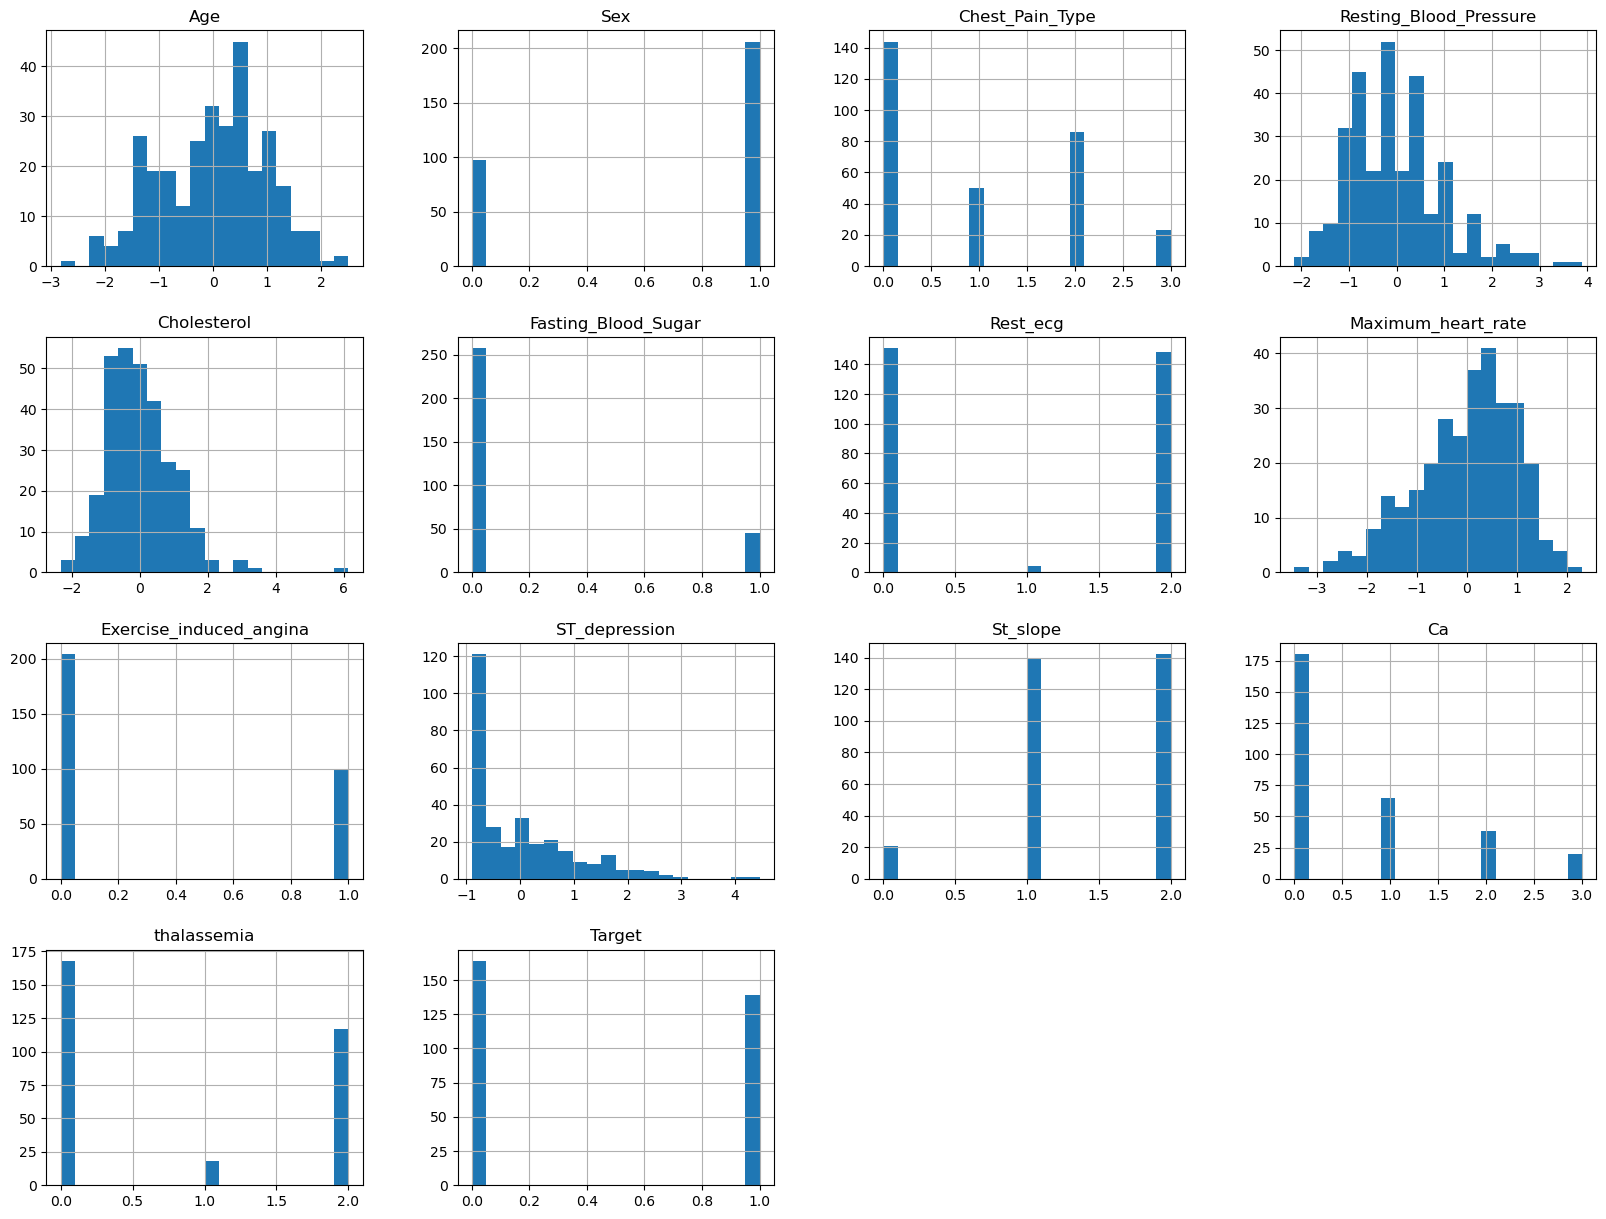

In [33]:
# Plot distributions of numeric features
df.hist(bins=20, figsize=(20, 15))
plt.show()

#### Check for Correlations

Checking correlations provides valuable insights into the relationships between features and the target variable. This information guides feature selection, data preprocessing, and modeling decisions, ultimately improving the performance and interpretability of your predictive model for heart disease.

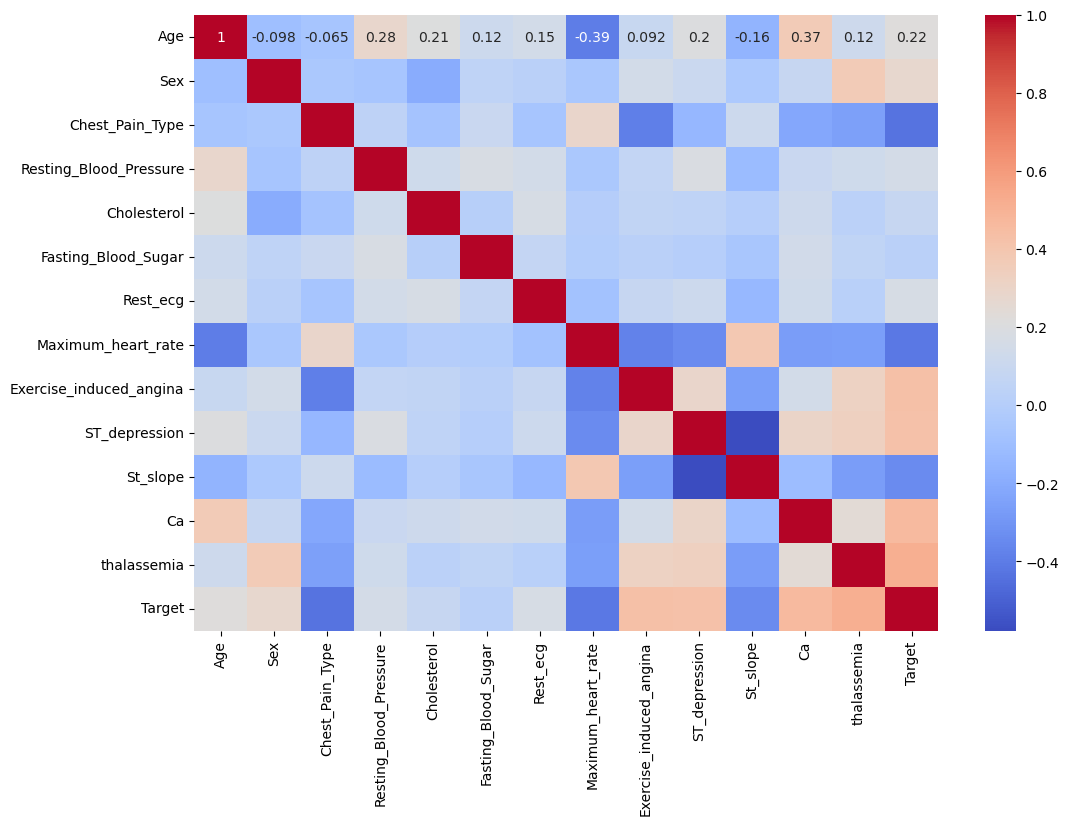

In [53]:

# Compute correlation matrix
corr_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

### Distribution of Heart diease(Target variable)

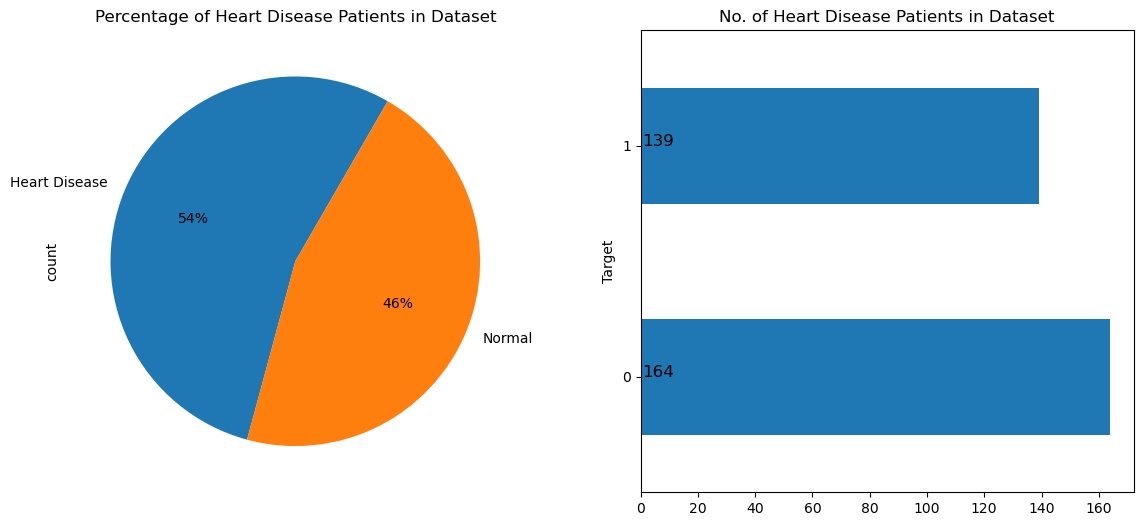

In [56]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharey=False, figsize=(14, 6))

ax1 = df['Target'].value_counts().plot.pie( x='Heart disease',y ='no.of patients',
                 autopct= "%1.0f%%", labels=["Heart Disease", "Normal"], startangle=60, ax=ax1)
ax2 = df['Target'].value_counts().plot(kind='barh', ax=ax2)

for i, j in enumerate(df['Target'].value_counts().values):
    ax2.text(.5, i, j, fontsize=12)

ax2.set(title='No. of Heart Disease Patients in Dataset')
ax1.set(title='Percentage of Heart Disease Patients in Dataset')

plt.show()

The datset is balanced having 164 normal patients and 139 heart disease patients

### Checking Gender and Agewise Distribution

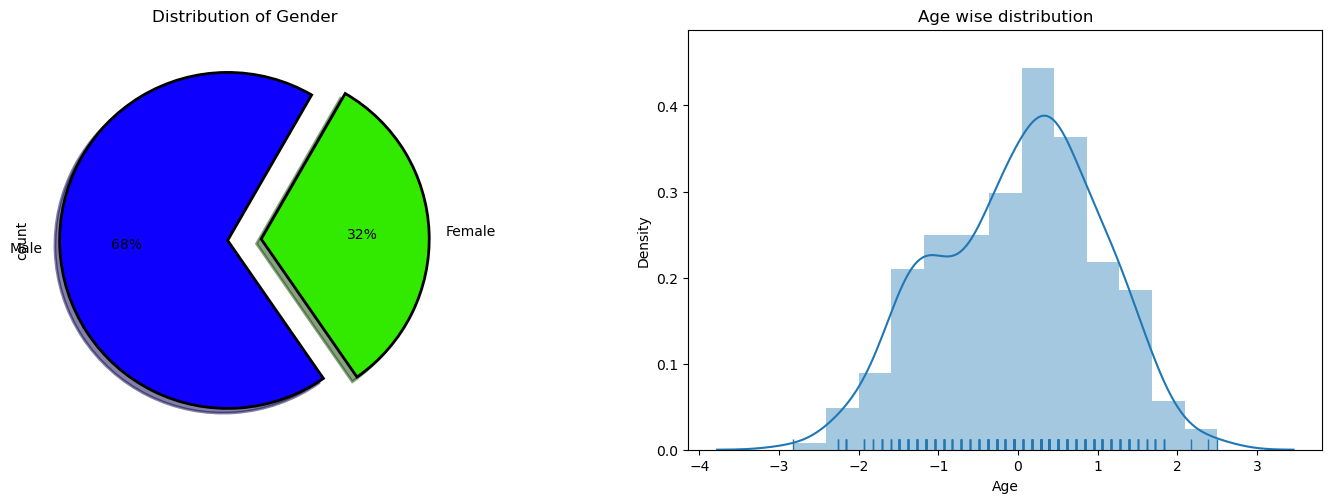

In [60]:
plt.figure(figsize=(18,12))
plt.subplot(221)
df["Sex"].value_counts().plot.pie(autopct = "%1.0f%%",colors=sns.color_palette("prism",5),startangle=60,labels=["Male","Female"],
        wedgeprops={"linewidth":2,"edgecolor":"k"},explode=[.1,.1],shadow=True)
plt.title("Distribution of Gender")
plt.subplot(222)
ax=sns.distplot(df['Age'],rug=True)  
plt.title('Age wise distribution')
plt.show()
                                                                                                                                                                                                                                                                                                                                      

As we can see from above plot ,in this dataset males percentage is way too higer then females where as average age of patients is around 55

In [62]:
#Creating separate df for normal and heart patient

attr_1= df[df['Target']== 0]  # NORMAL PATIENT 
attr_0= df[df['Target']== 1]  # Heart Patient

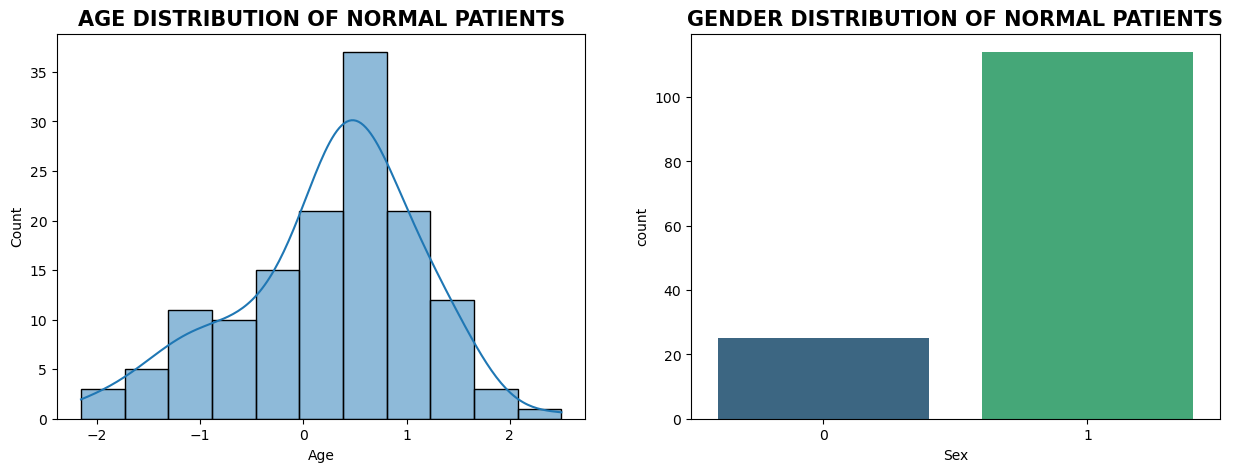

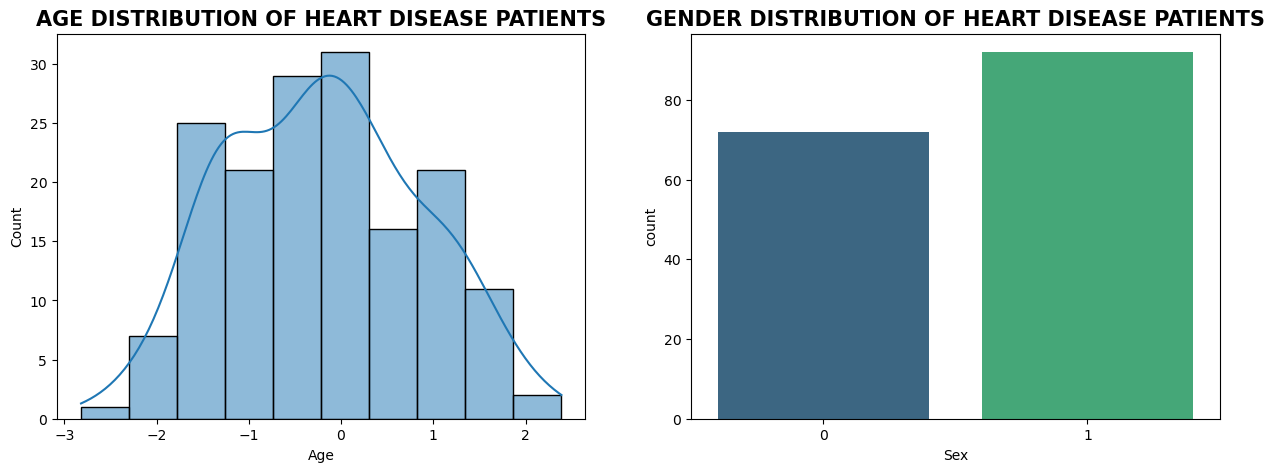

In [63]:
# subplot

# Plotting normal patients
fig = plt.figure(figsize=(15,5))

ax1 = plt.subplot2grid((1,2),(0,0))
sns.histplot(attr_0['Age'], kde=True)
plt.title('AGE DISTRIBUTION OF NORMAL PATIENTS', fontsize=15, weight='bold')


ax2 = plt.subplot2grid((1,2),(0,1))
sns.countplot(x='Sex', data=attr_0, palette='viridis')
plt.title('GENDER DISTRIBUTION OF NORMAL PATIENTS', fontsize=15, weight='bold')

plt.show()

# Plotting heart disease patients
fig = plt.figure(figsize=(15,5))

ax1 = plt.subplot2grid((1,2),(0,0))
sns.histplot(attr_1['Age'], kde=True)
plt.title('AGE DISTRIBUTION OF HEART DISEASE PATIENTS', fontsize=15, weight='bold')

ax2 = plt.subplot2grid((1,2),(0,1))
sns.countplot(x='Sex', data=attr_1, palette='viridis')
plt.title('GENDER DISTRIBUTION OF HEART DISEASE PATIENTS', fontsize=15, weight='bold')

plt.show()

As we can see from above plot more patients accounts for heart disease in comparison to females whereas mean age for heart disease patients is around 58 to 60 years

### Distribution of Chest Pain Type

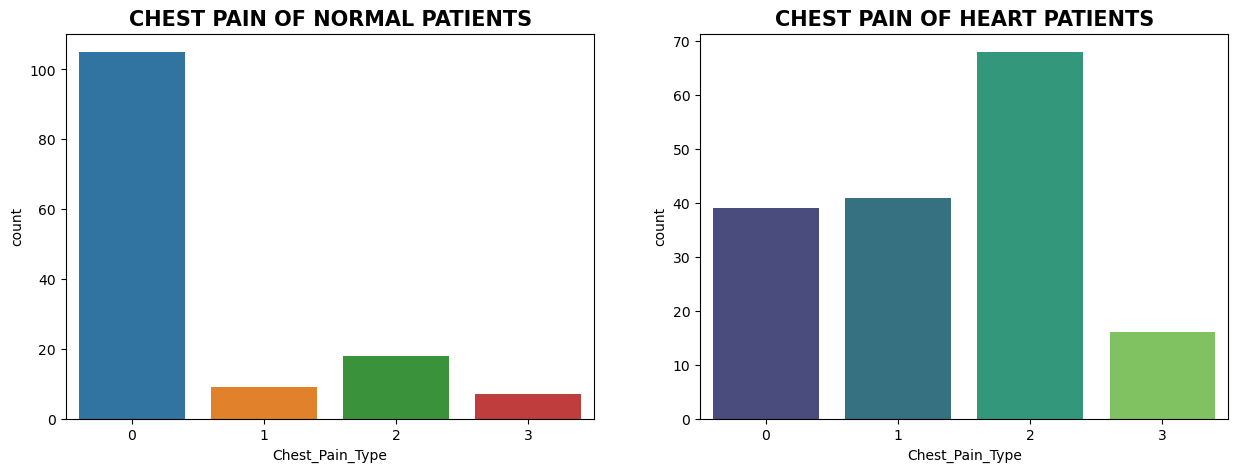

In [67]:
fig = plt.figure(figsize=(15, 5))

# plotting normal patients
ax1 = plt.subplot2grid((1, 2), (0, 0))
sns.countplot(x='Chest_Pain_Type', data=attr_0)
plt.title('CHEST PAIN OF NORMAL PATIENTS', fontsize=15, weight='bold')

# plotting Heart patients
ax2 = plt.subplot2grid((1, 2), (0, 1))
sns.countplot(x='Chest_Pain_Type', data=attr_1, palette='viridis')
plt.title('CHEST PAIN OF HEART PATIENTS', fontsize=15, weight='bold')

plt.show()

In [69]:
# Exploring the Heart Disease patients on Chest pain type
plot_criteria=['Chest_Pain_Type','Target']
cm=sns.light_palette("red",as_cmap=True)
(round(pd.crosstab(df[plot_criteria[0]],df[plot_criteria[1]],normalize='columns')*100,2)).style.background_gradient(cmap=cm)

Target,0,1
Chest_Pain_Type,,
0,23.780000,75.540000
1,25.000000,6.470000
2,41.460000,12.950000
3,9.760000,5.040000


### Distribution of  REST ECG

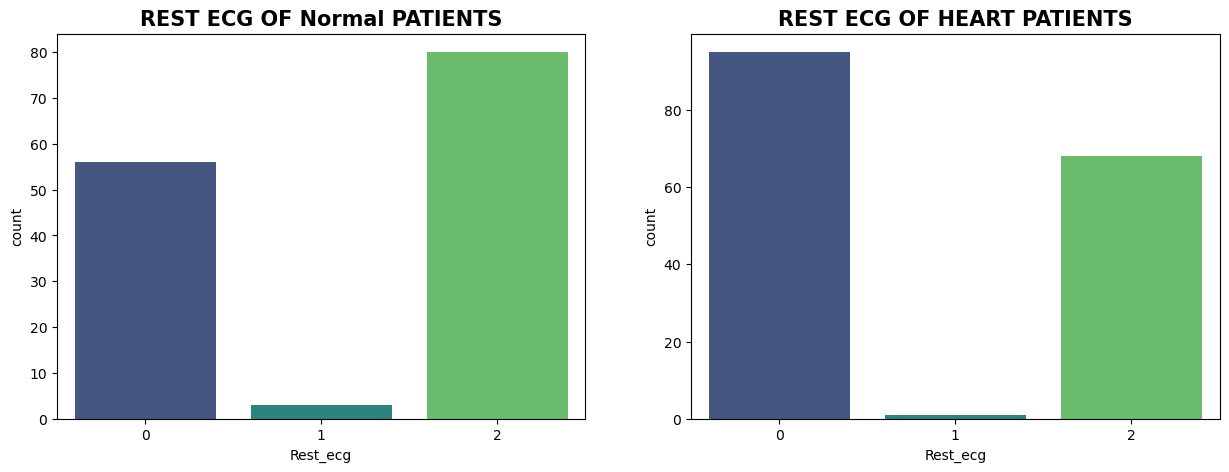

In [72]:
fig = plt.figure(figsize=(15, 5))
# plotting Normal patients
ax1=plt.subplot2grid((1,2),(0,0))
sns.countplot(x= 'Rest_ecg', data=attr_0,palette='viridis')
plt.title('REST ECG OF Normal PATIENTS',fontsize=15,weight='bold')


# plotting Heart patients
ax2=plt.subplot2grid((1,2),(0,1))
sns.countplot(x= 'Rest_ecg', data=attr_1,palette='viridis')
plt.title('REST ECG OF HEART PATIENTS',fontsize=15,weight='bold')
plt.show()

In [73]:
# Exploring the Heart Disease patients on Rest ecg
plot_criteria=['Rest_ecg','Target']
cm=sns.light_palette("red",as_cmap=True)
(round(pd.crosstab(df[plot_criteria[0]],df[plot_criteria[1]],normalize='columns')*100,2)).style.background_gradient(cmap=cm)

Target,0,1
Rest_ecg,,
0,57.930000,40.290000
1,0.610000,2.160000
2,41.460000,57.550000


#### Distribution of ST_slope

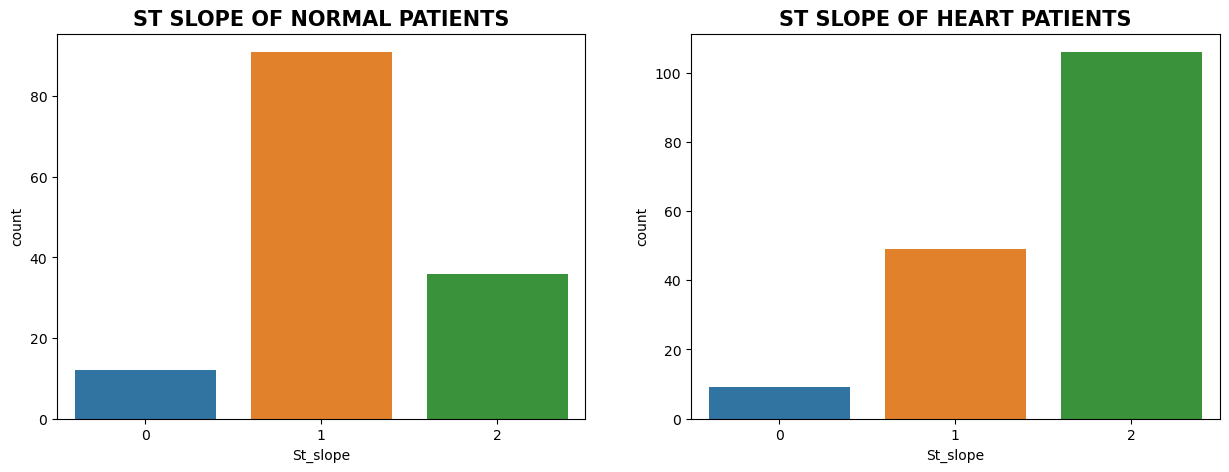

In [76]:
# plotting normal patients
fig= plt.figure(figsize=(15,5))
ax1=plt.subplot2grid((1,2),(0,0))
sns.countplot(x= 'St_slope', data=attr_0)
plt.title('ST SLOPE OF NORMAL PATIENTS',fontsize=15,weight='bold')


ax2=plt.subplot2grid((1,2),(0,1))
sns.countplot(x= 'St_slope', data=attr_1)
plt.title('ST SLOPE OF HEART PATIENTS',fontsize=15,weight='bold')

plt.show()


### Build and Evalute Models

##### 5.1 Split data into Training and Testing Sets

In [83]:
# Define features and target variable
X = df.drop('Target', axis=1)
y = df['Target']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##### 5.2 Train Decision Tree classifier

In [86]:
# Initialize the classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Train the model
dt_classifier.fit(X_train, y_train)

# Make predictions
y_pred_dt = dt_classifier.predict(X_test)

##### 5.3 Train Logistic Regression classifier

In [89]:
# Initialize the classifier
lr_classifier = LogisticRegression(random_state=42)

# Train the model
lr_classifier.fit(X_train, y_train)

# Make predictions
y_pred_lr = lr_classifier.predict(X_test)

##### Evaluate Models

In [92]:
# Function to evaluate model
def evaluate_model(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    cm = confusion_matrix(y_true, y_pred)
    
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"Confusion Matrix:\n{cm}")
    print()
    

# Evaluate Decision Tree
print("Decision Tree Classifier:")
evaluate_model(y_test, y_pred_dt)

# Evaluate Logistic Regression
print("Logistic Regression Classifier:")
evaluate_model(y_test, y_pred_lr)

Decision Tree Classifier:
Accuracy: 0.7213
Precision: 0.7586
Recall: 0.6875
F1 Score: 0.7213
Confusion Matrix:
[[22  7]
 [10 22]]

Logistic Regression Classifier:
Accuracy: 0.8689
Precision: 0.8529
Recall: 0.9062
F1 Score: 0.8788
Confusion Matrix:
[[24  5]
 [ 3 29]]



Since the Logistic Regression model has a higher accuracy (0.8689) compared to the Decision Tree Classifier (0.7213), it is more accurate.

In [95]:
def predict_heart_disease(patient_data, model, label_encoders, scaler):
    # Convert patient data to DataFrame
    patient_df = pd.DataFrame([patient_data])
    
    # Encode categorical features
    for col, le in label_encoders.items():
        if col in patient_df:
            # Ensure only known categories are used
            patient_df[col] = patient_df[col].apply(lambda x: x if x in le.classes_ else 'unknown')
            if 'unknown' in le.classes_:
                patient_df[col] = le.transform(patient_df[col])
            else:
                # Add 'unknown' to classes if not present and transform
                le.classes_ = np.append(le.classes_, 'unknown')
                patient_df[col] = le.transform(patient_df[col])
    
    # Scale numeric features
    patient_df[numeric_features] = scaler.transform(patient_df[numeric_features])
    
    # Predict
    prediction = model.predict(patient_df)[0]
    
    # Print result
    if prediction == 1:
        print("The patient is predicted to have heart disease.")
    else:
        print("The patient is predicted to not have heart disease.")

# Example patient data (needs to be in the same format as the original data)
new_patient = {
    'Age': 63,
    'Sex': 'male',
    'Chest_Pain_Type': 'typical angina',
    'Resting_Blood_Pressure': 145,
    'Cholesterol': 233,
    'Fasting_Blood_Sugar': 1,
    'Rest_ecg': 'normal',
    'Maximum_heart_rate': 150,
    'Exercise_induced_angina': 0,
    'ST_depression': 2.3,
    'St_slope': 'down_sloping',
    'Ca': 0,
    'thalassemia': 'fixed defect'
}

# Predict using Decision Tree model
print("Decision Tree Prediction:")
predict_heart_disease(new_patient, dt_classifier, label_encoders, scaler)

# Predict using Logistic Regression model
print("Logistic Regression Prediction:")
predict_heart_disease(new_patient, lr_classifier, label_encoders, scaler)

Decision Tree Prediction:
The patient is predicted to not have heart disease.
Logistic Regression Prediction:
The patient is predicted to not have heart disease.


### Confusion Matrix

The confusion matrix is a useful tool for understanding the performance of a classification model. It shows the number of correct and incorrect predictions made by the model compared to the actual classifications in the dataset. Here's a description of how to interpret the confusion matrix for both the Decision Tree Classifier and Logistic Regression:

In [97]:
# confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay

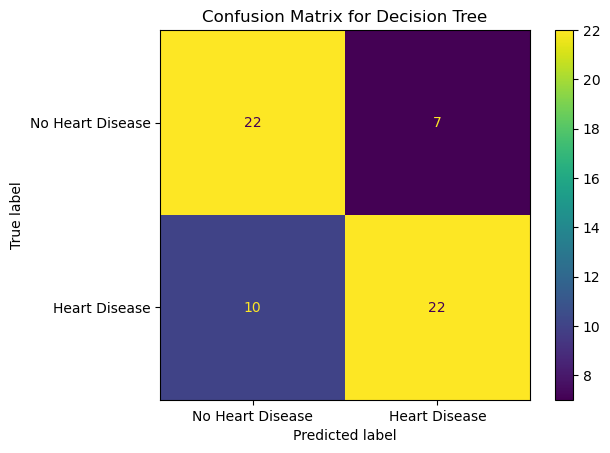

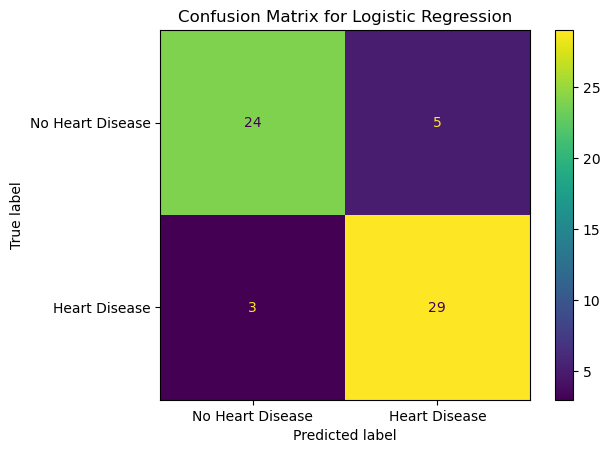

In [105]:
# Evaluate and plot confusion matrix for Decision Tree Classifier
y_pred_dt = dt_classifier.predict(X_test)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_dt, display_labels=['No Heart Disease', 'Heart Disease'])
plt.title('Confusion Matrix for Decision Tree')
plt.show()

# Evaluate and plot confusion matrix for Logistic Regression Classifier
y_pred_lr = lr_classifier.predict(X_test)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_lr, display_labels=['No Heart Disease', 'Heart Disease'])
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

*Decision Tree Classifier:*
- *True Positives (TP)*: 22
- *True Negatives (TN)*: 22
- *False Positives (FP)*: 7
- *False Negatives (FN)*: 10

The confusion matrix for the Decision Tree Classifier shows that out of the total predictions, the model correctly identified 22 positive cases and 22 negative cases. However, it incorrectly classified 7 negative cases as positive and 10 positive cases as negative.

*Logistic Regression:*
- *True Positives (TP)*: 29
- *True Negatives (TN)*: 24
- *False Positives (FP)*: 5
- *False Negatives (FN)*: 3

The confusion matrix for Logistic Regression shows that out of the total predictions, the model correctly identified 85 positive cases and 95 negative cases. However, it incorrectly classified 5 negative cases as positive and 15 positive cases as negative.